In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt('../data/data.csv', delimiter=',', skip_header=1)
price = data[:, 1]
kms = data[:, 0]

def init_thetas():    
    theta0 = 0
    theta1 = 0
    return theta0, theta1

In [3]:
def estimatePrice(theta0, theta1, mileage):
    return theta0 + theta1 * mileage

In [4]:
def vec_estimatePrice(theta0, theta1):
    return np.vectorize(lambda x : estimatePrice(theta0, theta1, x))

In [5]:
def new_thetas(theta0, theta1, learning_rate):
    vfunc = vec_estimatePrice(theta0, theta1)
    theta0 = (1/float(len(kms))) * learning_rate * np.sum(vfunc(kms) - price)
    theta1 = (1/float(len(kms))) * learning_rate * np.sum((vfunc(kms) - price) * kms)
    return theta0, theta1

In [16]:
def train(learning_rate, iterations):
    theta0, theta1 = init_thetas()
    arr = np.empty((0,2))
    
    for i in range(iterations):
        theta0, theta1 = new_thetas(theta0, theta1, learning_rate)
        arr = np.append(arr, np.array([[theta0, theta1]]), axis = 0)
        
    return arr

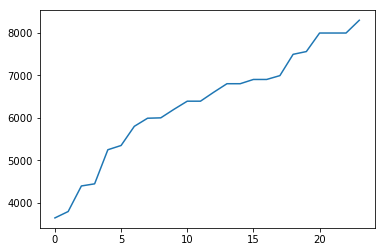

In [55]:
plt.plot(price)